# Interpolate atmospheric grids

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns
import pickle

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Configuration

In [6]:
! ls ../data/simplegrid

atmospherictransparencygrid_O2abs_test.npy
atmospherictransparencygrid_O2abs_training.npy
atmospherictransparencygrid_OZabs_test.npy
atmospherictransparencygrid_OZabs_training.npy
atmospherictransparencygrid_PWVabs_test.npy
atmospherictransparencygrid_PWVabs_training.npy
atmospherictransparencygrid_params_test.pickle
atmospherictransparencygrid_params_training.pickle
atmospherictransparencygrid_rayleigh_test.npy
atmospherictransparencygrid_rayleigh_training.npy


In [7]:
file01_in = f"../data/simplegrid/atmospherictransparencygrid_params_training.pickle"
file02_in = f"../data/simplegrid/atmospherictransparencygrid_params_test.pickle"

In [8]:
file1_in = f"../data/simplegrid/atmospherictransparencygrid_rayleigh_training.npy"
file2_in = f"../data/simplegrid/atmospherictransparencygrid_rayleigh_test.npy"

In [9]:
file3_in = f"../data/simplegrid/atmospherictransparencygrid_O2abs_training.npy"
file4_in = f"../data/simplegrid/atmospherictransparencygrid_O2abs_test.npy"

In [10]:
file5_in = f"../data/simplegrid/atmospherictransparencygrid_PWVabs_training.npy"
file6_in = f"../data/simplegrid/atmospherictransparencygrid_PWVabs_test.npy"

In [11]:
file7_in = f"../data/simplegrid/atmospherictransparencygrid_OZabs_training.npy"
file8_in = f"../data/simplegrid/atmospherictransparencygrid_OZabs_test.npy"

### wavelength

In [12]:
WLMIN=300.
WLMAX=1100.
WLBIN=1.
NWLBIN=int((WLMAX-WLMIN)/WLBIN)
WL=np.linspace(WLMIN,WLMAX,NWLBIN)

### airmass

In [13]:
AIRMASSMIN=1.0
AIRMASSMAX=2.6
#AIRMASSMAX=1.1
DAM = 0.1

In [14]:
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [15]:
airmasses

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5])

In [16]:
NAM=len(airmasses)

In [17]:
sequential_colors = sns.color_palette("hls", NAM)

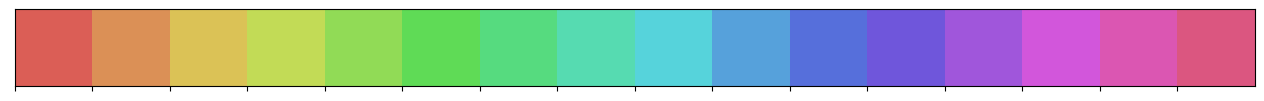

In [18]:
sns.palplot(sequential_colors)

In [19]:
airmass_training = airmasses
airmass_test = airmasses + DAM/2.

In [20]:
NX=len(airmasses)
NY=NWLBIN

### PWV

In [21]:
PWVMIN = 0
PWVMAX = 11
DPWV = 0.5

In [22]:
pwv_training = np.arange(PWVMIN,PWVMAX,DPWV)
pwv_test = pwv_training + DPWV/2.

In [23]:
NPWV = len(pwv_training)

### OZON

In [24]:
OZMIN = 0
OZMAX = 600
DOZ   = 100

In [25]:
oz_training = np.arange(OZMIN,OZMAX,DOZ)
oz_test = oz_training  + DOZ/2.

In [26]:
NOZ = len(oz_training)

# Loat Info Dictionaries

In [27]:
with open(file01_in, 'rb') as handle:
    info_params_training = pickle.load(handle)
with open(file02_in, 'rb') as handle:
    info_params_test = pickle.load(handle)

In [33]:
info_params_training

{'WLMIN': 300.0,
 'WLMAX': 1100.0,
 'WLBIN': 1.0,
 'NWLBIN': 800,
 'WL': array([ 300.        ,  301.00125156,  302.00250313,  303.00375469,
         304.00500626,  305.00625782,  306.00750939,  307.00876095,
         308.01001252,  309.01126408,  310.01251564,  311.01376721,
         312.01501877,  313.01627034,  314.0175219 ,  315.01877347,
         316.02002503,  317.0212766 ,  318.02252816,  319.02377972,
         320.02503129,  321.02628285,  322.02753442,  323.02878598,
         324.03003755,  325.03128911,  326.03254068,  327.03379224,
         328.0350438 ,  329.03629537,  330.03754693,  331.0387985 ,
         332.04005006,  333.04130163,  334.04255319,  335.04380476,
         336.04505632,  337.04630788,  338.04755945,  339.04881101,
         340.05006258,  341.05131414,  342.05256571,  343.05381727,
         344.05506884,  345.0563204 ,  346.05757196,  347.05882353,
         348.06007509,  349.06132666,  350.06257822,  351.06382979,
         352.06508135,  353.06633292,  354.0

In [34]:
WLMIN = info_params_training["WLMIN"]
WLMAX = info_params_training["WLMAX"]
WLBIN = info_params_training["WLBIN"]
NWLBIN = info_params_training['NWLBIN']
WL = info_params_training['WL']

In [35]:
AIRMASSMIN = info_params_training['AIRMASSMIN']
AIRMASSMAX = info_params_training['AIRMASSMAX']
NAIRMASS = info_params_training['NAIRMASS']
DAIRMASS = info_params_training['DAIRMASS']
AIRMASS = info_params_training['AIRMASS']

In [36]:
PWVMIN = info_params_training['PWVMIN']
PWVMAX = info_params_training['PWVMAX'] 
NPWV = info_params_training['NPWV']
DPWV = info_params_training['DPWV'] 
PWV = info_params_training['PWV']

In [38]:
OZMIN =  info_params_training['OZMIN']
OZVMAX = info_params_training['OZMAX']
NOZ = info_params_training['NOZ']
DOZ =  info_params_training['DOZ'] 
OZ = info_params_training['OZ']

KeyError: 'OZMAX'

### Load Data Table

In [28]:
with open(file1_in, 'rb') as f:
    data_rayleigh_training=np.load(f)
with open(file2_in, 'rb') as f:    
    data_rayleigh_test=np.load(f)
with open(file3_in, 'rb') as f:  
    data_O2abs_training=np.load(f)
with open(file4_in, 'rb') as f:     
    data_O2abs_test=np.load(f)

In [31]:
with open(file5_in, 'rb') as f:
    data_H2Oabs_training=np.load(f)
with open(file6_in, 'rb') as f:
    data_H2Oabs_test=np.load(f)

In [32]:
with open(file7_in, 'rb') as f:
    data_OZabs_training=np.load(f)
with open(file8_in, 'rb') as f:    
    data_OZabs_test=np.load(f)

# Interpolate